# WeatherPy

* The below scripts will be creating a visualization of weather for 500+ cities across the world of varying distance from the equator.There will be scatter plots and linear regression plots for visualzation and possible relationships.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

622

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#config info to start with
url = "http://api.openweathermap.org/data/2.5/weather?"

#check to see if cities populate- uncomment out below
#print(cities)

# Build query URL
query_url = url + "appid=" + weather_api_key + "&q="


In [8]:
# set up temp list

temps = []
clouds =[]
windspeeds = []
humidity_list =[]
country_list = []
date_list =[]
lat_list = []
lng_list = []
maxtemp = []
cities_final = []



weather_response = requests.get(query_url).json()

# build loop looking through json to find requested info
# change to fahrenheit in query

for city in cities:
    try:
        response = requests.get(query_url + city + "&units=imperial").json()
        pprint(response)
        temp = response['main']['temp']
        temps.append(temp)
        cloudiness = response['clouds']['all']
        clouds.append(cloudiness)
        wind_speed = response['wind']['speed']
        windspeeds.append(wind_speed)
        humidity = response['main']['humidity']
        humidity_list.append(humidity)
        date = response['dt']
        date_list.append(date)
        country = response['sys']['country']
        country_list.append(country)
        lat = response['coord']['lat']
        lat_list.append(lat)
        lng = response['coord']['lon']
        lng_list.append(lng)
        maxtemplist = response['main']['temp_max']
        maxtemp.append(maxtemplist)
        cities_final.append(city)
       

    except:
        print("end of response")    
    
        
       

{'base': 'stations',
 'clouds': {'all': 28},
 'cod': 200,
 'coord': {'lat': -34.53, 'lon': 20.04},
 'dt': 1589558868,
 'id': 1015776,
 'main': {'feels_like': 58.59,
          'humidity': 52,
          'pressure': 1021,
          'temp': 66.2,
          'temp_max': 66.2,
          'temp_min': 66.2},
 'name': 'Bredasdorp',
 'sys': {'country': 'ZA',
         'id': 1966,
         'sunrise': 1589520397,
         'sunset': 1589557558,
         'type': 1},
 'timezone': 7200,
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 280, 'speed': 12.75}}
{'cod': '404', 'message': 'city not found'}
end of response
{'base': 'stations',
 'clouds': {'all': 97},
 'cod': 200,
 'coord': {'lat': -54.8, 'lon': -68.3},
 'dt': 1589558869,
 'id': 3833367,
 'main': {'feels_like': 36.05,
          'humidity': 80,
          'pressure': 993,
          'temp': 41,
          'temp_max': 41,
          'temp_min': 41},

{'base': 'stations',
 'clouds': {'all': 92},
 'cod': 200,
 'coord': {'lat': 77.48, 'lon': -69.36},
 'dt': 1589559058,
 'id': 3831208,
 'main': {'feels_like': 25.88,
          'grnd_level': 1023,
          'humidity': 91,
          'pressure': 1023,
          'sea_level': 1023,
          'temp': 33.51,
          'temp_max': 33.51,
          'temp_min': 33.51},
 'name': 'Qaanaaq',
 'snow': {'1h': 0.2},
 'sys': {'country': 'GL', 'sunrise': 0, 'sunset': 0},
 'timezone': -10800,
 'weather': [{'description': 'light snow',
              'icon': '13n',
              'id': 600,
              'main': 'Snow'}],
 'wind': {'deg': 282, 'speed': 6.98}}
{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': -21.2, 'lon': -175.2},
 'dt': 1589559059,
 'id': 4032243,
 'main': {'feels_like': 72.77,
          'humidity': 100,
          'pressure': 1011,
          'temp': 68,
          'temp_max': 68,
          'temp_min': 68},
 'name': 'Vaini',
 'sys': {'country': 'TO',
         'id': 

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': -6.09, 'lon': -35.21},
 'dt': 1589559062,
 'id': 3393922,
 'main': {'feels_like': 84.52,
          'humidity': 94,
          'pressure': 1013,
          'temp': 78.8,
          'temp_max': 78.8,
          'temp_min': 78.8},
 'name': 'Nísia Floresta',
 'sys': {'country': 'BR',
         'id': 8452,
         'sunrise': 1589530931,
         'sunset': 1589573544,
         'type': 1},
 'timezone': -10800,
 'visibility': 8000,
 'weather': [{'description': 'shower rain',
              'icon': '09d',
              'id': 521,
              'main': 'Rain'}],
 'wind': {'deg': 210, 'speed': 10.29}}
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -38.27, 'lon': 141.97},
 'dt': 1589559062,
 'id': 2171099,
 'main': {'feels_like': 37.15,
          'grnd_level': 1027,
          'humidity': 83,
          'pressure': 1029,
          'sea_level': 1029,
          'temp': 43.56,
          'temp_max': 43.56,

{'base': 'stations',
 'clouds': {'all': 89},
 'cod': 200,
 'coord': {'lat': 62.88, 'lon': 152.43},
 'dt': 1589559065,
 'id': 2121373,
 'main': {'feels_like': 30.15,
          'grnd_level': 999,
          'humidity': 83,
          'pressure': 1024,
          'sea_level': 1024,
          'temp': 37.72,
          'temp_max': 37.72,
          'temp_min': 37.72},
 'name': 'Seymchan',
 'sys': {'country': 'RU', 'sunrise': 1589561146, 'sunset': 1589626063},
 'timezone': 39600,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 336, 'speed': 7.38}}
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -30.18, 'lon': -50.21},
 'dt': 1589559065,
 'id': 3466165,
 'main': {'feels_like': 59.86,
          'grnd_level': 1018,
          'humidity': 51,
          'pressure': 1019,
          'sea_level': 1019,
          'temp': 63.81,
          'temp_max': 63.81,
          'temp_min'

{'cod': '404', 'message': 'city not found'}
end of response
{'base': 'stations',
 'clouds': {'all': 2},
 'cod': 200,
 'coord': {'lat': -46.19, 'lon': 168.86},
 'dt': 1589559069,
 'id': 6201424,
 'main': {'feels_like': 34.27,
          'grnd_level': 1021,
          'humidity': 90,
          'pressure': 1027,
          'sea_level': 1027,
          'temp': 38.53,
          'temp_max': 38.53,
          'temp_min': 38.53},
 'name': 'Mataura',
 'sys': {'country': 'NZ', 'sunrise': 1589572814, 'sunset': 1589606508},
 'timezone': 43200,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 14, 'speed': 2.3}}
{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 69.22, 'lon': -51.1},
 'dt': 1589559069,
 'id': 3423146,
 'main': {'feels_like': 25.95,
          'humidity': 80,
          'pressure': 1019,
          'temp': 35.6,
          'temp_max': 35.6,
          'temp_min': 35.6},
 '

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': -22.97, 'lon': -42.03},
 'dt': 1589559072,
 'id': 3471451,
 'main': {'feels_like': 65.08,
          'humidity': 88,
          'pressure': 1020,
          'temp': 68,
          'temp_max': 68,
          'temp_min': 68},
 'name': 'Arraial do Cabo',
 'sys': {'country': 'BR',
         'id': 8326,
         'sunrise': 1589534058,
         'sunset': 1589573691,
         'type': 1},
 'timezone': -10800,
 'visibility': 8000,
 'weather': [{'description': 'light rain',
              'icon': '10d',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 153, 'speed': 14.03}}
{'base': 'stations',
 'clouds': {'all': 98},
 'cod': 200,
 'coord': {'lat': -9.11, 'lon': 124.89},
 'dt': 1589559072,
 'id': 1651103,
 'main': {'feels_like': 77.47,
          'grnd_level': 971,
          'humidity': 88,
          'pressure': 1010,
          'sea_level': 1010,
          'temp': 73.6,
          'temp_max': 73.6,
       

{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': 40.81, 'lon': 111.65},
 'dt': 1589559076,
 'id': 2036892,
 'main': {'feels_like': 60.91,
          'humidity': 34,
          'pressure': 1003,
          'temp': 66.2,
          'temp_max': 66.2,
          'temp_min': 66.2},
 'name': 'Hohhot',
 'sys': {'country': 'CN',
         'id': 9612,
         'sunrise': 1589577315,
         'sunset': 1589629469,
         'type': 1},
 'timezone': 28800,
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'speed': 4.47}}
{'base': 'stations',
 'clouds': {'all': 9},
 'cod': 200,
 'coord': {'lat': -41.07, 'lon': 145.92},
 'dt': 1589559077,
 'id': 2173125,
 'main': {'feels_like': 44.01,
          'humidity': 91,
          'pressure': 1022,
          'temp': 46.98,
          'temp_max': 50,
          'temp_min': 44.01},
 'name': 'Burnie',
 'sys': {'country': 'AU',


          'temp_min': 54},
 'name': 'Ayr',
 'sys': {'country': 'GB',
         'id': 1444,
         'sunrise': 1589515671,
         'sunset': 1589574125,
         'type': 1},
 'timezone': 3600,
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03d',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 250, 'speed': 11.41}}
{'base': 'stations',
 'clouds': {'all': 39},
 'cod': 200,
 'coord': {'lat': 43.27, 'lon': -7.54},
 'dt': 1589559079,
 'id': 3105522,
 'main': {'feels_like': 42.58,
          'humidity': 1,
          'pressure': 1019,
          'temp': 57,
          'temp_max': 57,
          'temp_min': 57},
 'name': 'Bereda',
 'sys': {'country': 'ES',
         'id': 2007090,
         'sunrise': 1589519155,
         'sunset': 1589572038,
         'type': 3},
 'timezone': 7200,
 'weather': [{'description': 'scattered clouds',
              'icon': '03d',
              'id': 802,
              'main': 'Clouds'}],
 'wind':

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': -34.64, 'lon': -56.29},
 'dt': 1589559082,
 'id': 3443411,
 'main': {'feels_like': 48.58,
          'humidity': 54,
          'pressure': 1016,
          'temp': 59.85,
          'temp_max': 60.8,
          'temp_min': 59},
 'name': 'Departamento de Canelones',
 'sys': {'country': 'UY',
         'id': 8687,
         'sunrise': 1589538739,
         'sunset': 1589575855,
         'type': 1},
 'timezone': -10800,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 340, 'speed': 17.22}}
{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 42.03, 'lon': -8.16},
 'dt': 1589559082,
 'id': 7117100,
 'main': {'feels_like': 58.87,
          'humidity': 56,
          'pressure': 1015,
          'temp': 63.88,
          'temp_max': 68,
          'temp_min': 61},
 'name': 'Vila',

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -12.58, 'lon': 13.41},
 'dt': 1589559085,
 'id': 3351663,
 'main': {'feels_like': 88.72,
          'grnd_level': 1009,
          'humidity': 65,
          'pressure': 1010,
          'sea_level': 1010,
          'temp': 84.7,
          'temp_max': 84.7,
          'temp_min': 84.7},
 'name': 'Benguela',
 'sys': {'country': 'AO', 'sunrise': 1589519808, 'sunset': 1589561329},
 'timezone': 3600,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 256, 'speed': 7.92}}
{'base': 'stations',
 'clouds': {'all': 95},
 'cod': 200,
 'coord': {'lat': 43.57, 'lon': -7.25},
 'dt': 1589559085,
 'id': 3122172,
 'main': {'feels_like': 42.58,
          'humidity': 1,
          'pressure': 1019,
          'temp': 57,
          'temp_max': 57,
          'temp_min': 57},
 'name': 'Foz',
 'sys': {'country': 'ES',
         'id': 2007090,
     

{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 63.84, 'lon': -22.43},
 'dt': 1589559088,
 'id': 3416888,
 'main': {'feels_like': 31.55,
          'humidity': 52,
          'pressure': 1020,
          'temp': 46.4,
          'temp_max': 46.4,
          'temp_min': 46.4},
 'name': 'Grindavik',
 'sys': {'country': 'IS',
         'id': 90,
         'sunrise': 1589516209,
         'sunset': 1589582131,
         'type': 1},
 'timezone': 0,
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
              'icon': '02d',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 30, 'speed': 19.46}}
{'base': 'stations',
 'clouds': {'all': 93},
 'cod': 200,
 'coord': {'lat': 45.46, 'lon': 41.97},
 'dt': 1589559089,
 'id': 565289,
 'main': {'feels_like': 67.53,
          'humidity': 33,
          'pressure': 1014,
          'temp': 75.2,
          'temp_max': 75.2,
          'temp_min': 75.2},
 'name': 'Donskoye',
 'sys': {'country': 'RU

{'base': 'stations',
 'clouds': {'all': 65},
 'cod': 200,
 'coord': {'lat': 35.17, 'lon': -2.93},
 'dt': 1589558838,
 'id': 2541479,
 'main': {'feels_like': 63.46,
          'humidity': 46,
          'pressure': 1011,
          'temp': 68.16,
          'temp_max': 69.8,
          'temp_min': 66.2},
 'name': 'Nador',
 'sys': {'country': 'MA',
         'id': 2380,
         'sunrise': 1589519258,
         'sunset': 1589569722,
         'type': 1},
 'timezone': 0,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 50, 'speed': 6.93}}
{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': -45.87, 'lon': -67.5},
 'dt': 1589559092,
 'id': 3860443,
 'main': {'feels_like': 51.21,
          'humidity': 93,
          'pressure': 999,
          'temp': 51.8,
          'temp_max': 51.8,
          'temp_min': 51.8},
 'name': 'Comodoro Rivadavia',
 'sys': {'co

{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': 37.81, 'lon': -85.47},
 'dt': 1589559095,
 'id': 4283133,
 'main': {'feels_like': 69.1,
          'humidity': 73,
          'pressure': 1017,
          'temp': 70.47,
          'temp_max': 71.6,
          'temp_min': 69.8},
 'name': 'Bardstown',
 'sys': {'country': 'US',
         'id': 3505,
         'sunrise': 1589538696,
         'sunset': 1589589904,
         'type': 1},
 'timezone': -14400,
 'visibility': 16093,
 'weather': [{'description': 'scattered clouds',
              'icon': '03d',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 210, 'speed': 9.17}}
{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 46.42, 'lon': 3.91},
 'dt': 1589559095,
 'id': 2980080,
 'main': {'feels_like': 58.06,
          'humidity': 59,
          'pressure': 1017,
          'temp': 60.8,
          'temp_max': 60.8,
          'temp_min': 60.8},
 'name': 'Saint-François',
 'sy

{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': -3.68, 'lon': -80.68},
 'dt': 1589559098,
 'id': 3690608,
 'main': {'feels_like': 85.96,
          'humidity': 78,
          'pressure': 1012,
          'temp': 80.6,
          'temp_max': 80.6,
          'temp_min': 80.6},
 'name': 'Zorritos',
 'sys': {'country': 'PE',
         'id': 8673,
         'sunrise': 1589541644,
         'sunset': 1589584657,
         'type': 1},
 'timezone': -18000,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 40, 'speed': 6.93}}
{'cod': '404', 'message': 'city not found'}
end of response
{'base': 'stations',
 'clouds': {'all': 24},
 'cod': 200,
 'coord': {'lat': 31.22, 'lon': 29.96},
 'dt': 1589558946,
 'id': 361058,
 'main': {'feels_like': 80.19,
          'humidity': 51,
          'pressure': 1010,
          'temp': 82.4,
          'temp_max': 82.4,
   

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 16.52, 'lon': -98.75},
 'dt': 1589559102,
 'id': 3516171,
 'main': {'feels_like': 90.14,
          'grnd_level': 1013,
          'humidity': 50,
          'pressure': 1013,
          'sea_level': 1013,
          'temp': 87.87,
          'temp_max': 87.87,
          'temp_min': 87.87},
 'name': 'Barra de Tecoanapa',
 'sys': {'country': 'MX', 'sunrise': 1589544256, 'sunset': 1589590718},
 'timezone': -18000,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 217, 'speed': 6.85}}
{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': -12.04, 'lon': -77.03},
 'dt': 1589558866,
 'id': 3936456,
 'main': {'feels_like': 67.03,
          'humidity': 82,
          'pressure': 1013,
          'temp': 66.2,
          'temp_max': 66.2,
          'temp_min': 66.2},
 'name': 'Lima',
 'sys': {'country': 'PE',
    

{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 68.12, 'lon': 13.5},
 'dt': 1589559105,
 'id': 3155152,
 'main': {'feels_like': 27.93,
          'humidity': 82,
          'pressure': 990,
          'temp': 35.6,
          'temp_max': 35.6,
          'temp_min': 35.6},
 'name': 'Gravdal',
 'sys': {'country': 'NO',
         'id': 1642,
         'sunrise': 1589503646,
         'sunset': 1589577448,
         'type': 1},
 'timezone': 7200,
 'visibility': 5000,
 'weather': [{'description': 'rain and snow',
              'icon': '13d',
              'id': 616,
              'main': 'Snow'}],
 'wind': {'deg': 200, 'speed': 6.93}}
{'base': 'stations',
 'clouds': {'all': 5},
 'cod': 200,
 'coord': {'lat': 65.61, 'lon': -37.64},
 'dt': 1589559105,
 'id': 3424607,
 'main': {'feels_like': 26.96,
          'humidity': 74,
          'pressure': 1024,
          'temp': 35.6,
          'temp_max': 35.6,
          'temp_min': 35.6},
 'name': 'Tasiilaq',
 'sys': {'country': 'G

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 60.92, 'lon': -46.05},
 'dt': 1589559108,
 'id': 3421719,
 'main': {'feels_like': 39.36,
          'humidity': 24,
          'pressure': 1017,
          'temp': 55.4,
          'temp_max': 55.4,
          'temp_min': 55.4},
 'name': 'Narsaq',
 'sys': {'country': 'GL',
         'id': 47,
         'sunrise': 1589523493,
         'sunset': 1589586185,
         'type': 1},
 'timezone': -7200,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 50, 'speed': 19.46}}
{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': 13.22, 'lon': -59.52},
 'dt': 1589559108,
 'id': 3374083,
 'main': {'feels_like': 83.05,
          'humidity': 58,
          'pressure': 1016,
          'temp': 87.8,
          'temp_max': 87.8,
          'temp_min': 87.8},
 'name': 'Bathsheba',
 'sys': {'countr

{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 58.52, 'lon': -117.14},
 'dt': 1589558890,
 'id': 5975004,
 'main': {'feels_like': 31.71,
          'humidity': 35,
          'pressure': 1017,
          'temp': 41,
          'temp_max': 41,
          'temp_min': 41},
 'name': 'High Level',
 'sys': {'country': 'CA',
         'id': 867,
         'sunrise': 1589541567,
         'sunset': 1589602235,
         'type': 1},
 'timezone': -21600,
 'visibility': 24140,
 'weather': [{'description': 'few clouds',
              'icon': '02d',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 10, 'speed': 6.93}}
{'base': 'stations',
 'clouds': {'all': 98},
 'cod': 200,
 'coord': {'lat': 22.93, 'lon': 57.53},
 'dt': 1589559111,
 'id': 286987,
 'main': {'feels_like': 85.6,
          'grnd_level': 951,
          'humidity': 26,
          'pressure': 1007,
          'sea_level': 1007,
          'temp': 89.96,
          'temp_max': 89.96,
          'te

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 62.68, 'lon': 8.55},
 'dt': 1589559114,
 'id': 3135377,
 'main': {'feels_like': 12.09,
          'humidity': 77,
          'pressure': 1005,
          'temp': 34.93,
          'temp_max': 35.6,
          'temp_min': 33.8},
 'name': 'Sunndalsøra',
 'sys': {'country': 'NO',
         'id': 1636,
         'sunrise': 1589509495,
         'sunset': 1589573974,
         'type': 1},
 'timezone': 7200,
 'visibility': 10000,
 'weather': [{'description': 'shower rain',
              'icon': '09d',
              'id': 521,
              'main': 'Rain'}],
 'wind': {'deg': 270, 'gust': 36.91, 'speed': 33.33}}
{'base': 'stations',
 'clouds': {'all': 80},
 'cod': 200,
 'coord': {'lat': 47.41, 'lon': 42.76},
 'dt': 1589559114,
 'id': 564593,
 'main': {'feels_like': 60.84,
          'grnd_level': 1006,
          'humidity': 79,
          'pressure': 1013,
          'sea_level': 1013,
          'temp': 62.92,
          'temp_max'

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 14.05, 'lon': 124.17},
 'dt': 1589559117,
 'id': 1695546,
 'main': {'feels_like': 85.69,
          'grnd_level': 1008,
          'humidity': 82,
          'pressure': 1008,
          'sea_level': 1008,
          'temp': 82.35,
          'temp_max': 82.35,
          'temp_min': 82.35},
 'name': 'Pandan',
 'rain': {'1h': 1.09},
 'sys': {'country': 'PH', 'sunrise': 1589577374, 'sunset': 1589623401},
 'timezone': 28800,
 'weather': [{'description': 'moderate rain',
              'icon': '10n',
              'id': 501,
              'main': 'Rain'}],
 'wind': {'deg': 133, 'speed': 13.8}}
{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': -5.2, 'lon': -35.46},
 'dt': 1589559117,
 'id': 3386213,
 'main': {'feels_like': 84.52,
          'humidity': 94,
          'pressure': 1013,
          'temp': 78.8,
          'temp_max': 78.8,
          'temp_min': 78.8},
 'name': 'Touros',
 'sys': {'count

{'base': 'stations',
 'clouds': {'all': 60},
 'cod': 200,
 'coord': {'lat': -35.33, 'lon': -72.42},
 'dt': 1589559121,
 'id': 3893726,
 'main': {'feels_like': 60.35,
          'grnd_level': 1018,
          'humidity': 63,
          'pressure': 1021,
          'sea_level': 1021,
          'temp': 66.22,
          'temp_max': 66.22,
          'temp_min': 66.22},
 'name': 'Constitución',
 'sys': {'country': 'CL', 'sunrise': 1589542697, 'sunset': 1589579639},
 'timezone': -14400,
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 203, 'speed': 12.19}}
{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': -28.65, 'lon': 153.62},
 'dt': 1589559121,
 'id': 2172880,
 'main': {'feels_like': 53.58,
          'humidity': 93,
          'pressure': 1024,
          'temp': 56.68,
          'temp_max': 59,
          'temp_min': 55},
 'name': 'Byron Bay',
 'sys': {'country': 'AU',


{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 24.78, 'lon': 112.38},
 'dt': 1589559125,
 'id': 1803841,
 'main': {'feels_like': 80.67,
          'grnd_level': 996,
          'humidity': 88,
          'pressure': 1008,
          'sea_level': 1008,
          'temp': 75.07,
          'temp_max': 75.07,
          'temp_min': 75.07},
 'name': 'Lianzhou',
 'rain': {'1h': 0.2},
 'sys': {'country': 'CN', 'sunrise': 1589579169, 'sunset': 1589627265},
 'timezone': 28800,
 'weather': [{'description': 'light rain',
              'icon': '10n',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 160, 'speed': 4.76}}
{'cod': '404', 'message': 'city not found'}
end of response
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -17.88, 'lon': 15.07},
 'dt': 1589559126,
 'id': 3354178,
 'main': {'feels_like': 76.28,
          'grnd_level': 895,
          'humidity': 23,
          'pressure': 1013,
          'sea_level': 1013,


{'base': 'stations',
 'clouds': {'all': 52},
 'cod': 200,
 'coord': {'lat': -3.48, 'lon': 23.43},
 'dt': 1589559129,
 'id': 211647,
 'main': {'feels_like': 88.65,
          'grnd_level': 958,
          'humidity': 63,
          'pressure': 1009,
          'sea_level': 1009,
          'temp': 82.92,
          'temp_max': 82.92,
          'temp_min': 82.92},
 'name': 'Lodja',
 'sys': {'country': 'CD', 'sunrise': 1589516640, 'sunset': 1589559687},
 'timezone': 7200,
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 126, 'speed': 2.53}}
{'cod': '404', 'message': 'city not found'}
end of response
{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': 38.42, 'lon': -121.42},
 'dt': 1589559050,
 'id': 5364271,
 'main': {'feels_like': 57.79,
          'humidity': 82,
          'pressure': 1019,
          'temp': 59.59,
          'temp_max': 62.01,
          'temp_min': 55.4}

{'base': 'stations',
 'clouds': {'all': 23},
 'cod': 200,
 'coord': {'lat': 40.43, 'lon': 71.72},
 'dt': 1589559132,
 'id': 1513491,
 'main': {'feels_like': 66.33,
          'humidity': 49,
          'pressure': 1014,
          'temp': 68,
          'temp_max': 68,
          'temp_min': 68},
 'name': 'Yangi Marg`ilon',
 'sys': {'country': 'UZ',
         'id': 9011,
         'sunrise': 1589500606,
         'sunset': 1589552541,
         'type': 1},
 'timezone': 18000,
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'speed': 2.24}}
{'base': 'stations',
 'clouds': {'all': 4},
 'cod': 200,
 'coord': {'lat': -17.71, 'lon': -39.25},
 'dt': 1589559132,
 'id': 3466980,
 'main': {'feels_like': 83.61,
          'grnd_level': 1015,
          'humidity': 73,
          'pressure': 1015,
          'sea_level': 1015,
          'temp': 80.67,
          'temp_max': 80.67,
          'temp_m

{'base': 'stations',
 'clouds': {'all': 65},
 'cod': 200,
 'coord': {'lat': 56.66, 'lon': 22.49},
 'dt': 1589559136,
 'id': 455890,
 'main': {'feels_like': 37.15,
          'grnd_level': 997,
          'humidity': 78,
          'pressure': 1010,
          'sea_level': 1010,
          'temp': 46.38,
          'temp_max': 46.38,
          'temp_min': 46.38},
 'name': 'Saldus',
 'rain': {'1h': 0.24},
 'sys': {'country': 'LV', 'sunrise': 1589508779, 'sunset': 1589567999},
 'timezone': 10800,
 'weather': [{'description': 'light rain',
              'icon': '10d',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 253, 'speed': 12.41}}
{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 66, 'lon': 111.5},
 'dt': 1589559136,
 'id': 2027296,
 'main': {'feels_like': 30.29,
          'humidity': 69,
          'pressure': 1019,
          'temp': 39.2,
          'temp_max': 39.2,
          'temp_min': 39.2},
 'name': 'Aykhal',
 'sys': {'country': 'RU'

{'base': 'stations',
 'clouds': {'all': 66},
 'cod': 200,
 'coord': {'lat': 60.38, 'lon': 92.63},
 'dt': 1589559139,
 'id': 1489656,
 'main': {'feels_like': 40.08,
          'grnd_level': 991,
          'humidity': 67,
          'pressure': 1015,
          'sea_level': 1015,
          'temp': 45.46,
          'temp_max': 45.46,
          'temp_min': 45.46},
 'name': 'Teya',
 'sys': {'country': 'RU', 'sunrise': 1589490517, 'sunset': 1589552593},
 'timezone': 25200,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 155, 'speed': 4.07}}
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 39.47, 'lon': 141.95},
 'dt': 1589559139,
 'id': 2110560,
 'main': {'feels_like': 48.81,
          'grnd_level': 1016,
          'humidity': 80,
          'pressure': 1018,
          'sea_level': 1018,
          'temp': 52.66,
          'temp_max': 52.66,
          'temp_min': 52.6

{'base': 'stations',
 'clouds': {'all': 9},
 'cod': 200,
 'coord': {'lat': -10.13, 'lon': -36.18},
 'dt': 1589559143,
 'id': 3465329,
 'main': {'feels_like': 85.32,
          'grnd_level': 1014,
          'humidity': 68,
          'pressure': 1014,
          'sea_level': 1014,
          'temp': 83.35,
          'temp_max': 83.35,
          'temp_min': 83.35},
 'name': 'Coruripe',
 'sys': {'country': 'BR', 'sunrise': 1589531502, 'sunset': 1589573438},
 'timezone': -10800,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 121, 'speed': 11.59}}
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 4.93, 'lon': -52.33},
 'dt': 1589558988,
 'id': 3382160,
 'main': {'feels_like': 88.86,
          'humidity': 100,
          'pressure': 1015,
          'temp': 78.8,
          'temp_max': 78.8,
          'temp_min': 78.8},
 'name': 'Cayenne',
 'sys': {'country': 'GF',
         

{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 57.79, 'lon': -152.41},
 'dt': 1589559147,
 'id': 5866583,
 'main': {'feels_like': 34.39,
          'humidity': 81,
          'pressure': 1013,
          'temp': 44.6,
          'temp_max': 44.6,
          'temp_min': 44.6},
 'name': 'Saint Paul Harbor',
 'sys': {'country': 'US',
         'id': 7668,
         'sunrise': 1589550298,
         'sunset': 1589610434,
         'type': 1},
 'timezone': -28800,
 'visibility': 16093,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 50, 'speed': 13.87}}
{'base': 'stations',
 'clouds': {'all': 77},
 'cod': 200,
 'coord': {'lat': 7.93, 'lon': 1.98},
 'dt': 1589559147,
 'id': 2391895,
 'main': {'feels_like': 98.11,
          'grnd_level': 989,
          'humidity': 54,
          'pressure': 1008,
          'sea_level': 1008,
          'temp': 91.62,
          'temp_max': 

{'base': 'stations',
 'clouds': {'all': 84},
 'cod': 200,
 'coord': {'lat': 63.92, 'lon': 127.47},
 'dt': 1589559151,
 'id': 2017215,
 'main': {'feels_like': 38.14,
          'grnd_level': 1012,
          'humidity': 66,
          'pressure': 1021,
          'sea_level': 1021,
          'temp': 44.83,
          'temp_max': 44.83,
          'temp_min': 44.83},
 'name': 'Sangar',
 'sys': {'country': 'RU', 'sunrise': 1589566470, 'sunset': 1589632720},
 'timezone': 32400,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 94, 'speed': 6.13}}
{'base': 'stations',
 'clouds': {'all': 86},
 'cod': 200,
 'coord': {'lat': 61.99, 'lon': -49.67},
 'dt': 1589559151,
 'id': 3421193,
 'main': {'feels_like': 31.42,
          'grnd_level': 1017,
          'humidity': 86,
          'pressure': 1017,
          'sea_level': 1017,
          'temp': 39.61,
          'temp_max': 39.61,
          'temp_min': 39

{'base': 'stations',
 'clouds': {'all': 7},
 'cod': 200,
 'coord': {'lat': -19.06, 'lon': -169.92},
 'dt': 1589559155,
 'id': 4036284,
 'main': {'feels_like': 73.4,
          'humidity': 100,
          'pressure': 1010,
          'temp': 68,
          'temp_max': 68,
          'temp_min': 68},
 'name': 'Alofi',
 'sys': {'country': 'NU',
         'id': 7306,
         'sunrise': 1589564392,
         'sunset': 1589604745,
         'type': 1},
 'timezone': -39600,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 270, 'speed': 2.24}}
{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 9.84, 'lon': -83.87},
 'dt': 1589559155,
 'id': 3622547,
 'main': {'feels_like': 80.47,
          'humidity': 57,
          'pressure': 1017,
          'temp': 80.74,
          'temp_max': 82.4,
          'temp_min': 78.8},
 'name': 'Paraíso',
 'sys': {'country': 'CR',
         'id': 7205,
 

{'base': 'stations',
 'clouds': {'all': 93},
 'cod': 200,
 'coord': {'lat': 57.8, 'lon': 158.67},
 'dt': 1589559158,
 'id': 2120612,
 'main': {'feels_like': 31.23,
          'grnd_level': 1007,
          'humidity': 87,
          'pressure': 1014,
          'sea_level': 1014,
          'temp': 35.11,
          'temp_max': 35.11,
          'temp_min': 35.11},
 'name': "Tigil'",
 'sys': {'country': 'RU', 'sunrise': 1589562019, 'sunset': 1589622195},
 'timezone': 43200,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 124, 'speed': 0.47}}
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 54.43, 'lon': 113.6},
 'dt': 1589559159,
 'id': 2027244,
 'main': {'feels_like': 27.18,
          'grnd_level': 903,
          'humidity': 90,
          'pressure': 1008,
          'sea_level': 1008,
          'temp': 35.28,
          'temp_max': 35.28,
          'temp_min': 3

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 5.67, 'lon': 73},
 'dt': 1589559162,
 'id': 1337619,
 'main': {'feels_like': 77.76,
          'grnd_level': 1009,
          'humidity': 79,
          'pressure': 1009,
          'sea_level': 1009,
          'temp': 82.85,
          'temp_max': 82.85,
          'temp_min': 82.85},
 'name': 'Ugoofaaru',
 'rain': {'1h': 0.82},
 'sys': {'country': 'MV', 'sunrise': 1589503986, 'sunset': 1589548547},
 'timezone': 18000,
 'weather': [{'description': 'light rain',
              'icon': '10n',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 273, 'speed': 28.1}}
{'cod': '404', 'message': 'city not found'}
end of response
{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 46.46, 'lon': 10.35},
 'dt': 1589559163,
 'id': 3175788,
 'main': {'feels_like': 39.36,
          'humidity': 61,
          'pressure': 1015,
          'temp': 48.2,
          'temp_max': 48.2,
        

{'base': 'stations',
 'clouds': {'all': 32},
 'cod': 200,
 'coord': {'lat': -5.42, 'lon': -80.78},
 'dt': 1589559166,
 'id': 3690935,
 'main': {'feels_like': 79.63,
          'grnd_level': 1010,
          'humidity': 57,
          'pressure': 1013,
          'sea_level': 1013,
          'temp': 79.9,
          'temp_max': 79.9,
          'temp_min': 79.9},
 'name': 'Vice',
 'sys': {'country': 'PE', 'sunrise': 1589541813, 'sunset': 1589584536},
 'timezone': -18000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03d',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 171, 'speed': 8.57}}
{'base': 'stations',
 'clouds': {'all': 25},
 'cod': 200,
 'coord': {'lat': 52.45, 'lon': 64.63},
 'dt': 1589559166,
 'id': 1519924,
 'main': {'feels_like': 58.68,
          'grnd_level': 995,
          'humidity': 70,
          'pressure': 1008,
          'sea_level': 1008,
          'temp': 60.71,
          'temp_max': 60.71,
          'temp_min': 60.7

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 62.53, 'lon': 155.8},
 'dt': 1589559171,
 'id': 2122493,
 'main': {'feels_like': 26.98,
          'grnd_level': 957,
          'humidity': 92,
          'pressure': 1021,
          'sea_level': 1021,
          'temp': 33.6,
          'temp_max': 33.6,
          'temp_min': 33.6},
 'name': 'Omsukchan',
 'sys': {'country': 'RU', 'sunrise': 1589560542, 'sunset': 1589625050},
 'timezone': 39600,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 349, 'speed': 5.28}}
{'base': 'stations',
 'clouds': {'all': 34},
 'cod': 200,
 'coord': {'lat': 39.58, 'lon': 35.33},
 'dt': 1589559171,
 'id': 296560,
 'main': {'feels_like': 69.78,
          'grnd_level': 891,
          'humidity': 48,
          'pressure': 1018,
          'sea_level': 1018,
          'temp': 72.43,
          'temp_max': 72.43,
          'temp_min': 72.

{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': 18.22, 'lon': -63.06},
 'dt': 1589559167,
 'id': 3573374,
 'main': {'feels_like': 80.64,
          'humidity': 58,
          'pressure': 1018,
          'temp': 84.34,
          'temp_max': 86,
          'temp_min': 82.99},
 'name': 'The Valley',
 'sys': {'country': 'AI',
         'id': 8788,
         'sunrise': 1589535535,
         'sunset': 1589582308,
         'type': 1},
 'timezone': -14400,
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03d',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 110, 'speed': 18.34}}
{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 1.3, 'lon': 124.91},
 'dt': 1589559174,
 'id': 1623424,
 'main': {'feels_like': 85.55,
          'humidity': 94,
          'pressure': 1009,
          'temp': 77,
          'temp_max': 77,
          'temp_min': 77},
 'name': 'Tondano',
 'sys': {'count

{'base': 'stations',
 'clouds': {'all': 2},
 'cod': 200,
 'coord': {'lat': -16.23, 'lon': 39.91},
 'dt': 1589559177,
 'id': 1052944,
 'main': {'feels_like': 73.67,
          'grnd_level': 1013,
          'humidity': 78,
          'pressure': 1016,
          'sea_level': 1016,
          'temp': 74.01,
          'temp_max': 74.01,
          'temp_min': 74.01},
 'name': 'Angoche',
 'sys': {'country': 'MZ', 'sunrise': 1589513765, 'sunset': 1589554652},
 'timezone': 7200,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 203, 'speed': 11.34}}
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 68.05, 'lon': 39.51},
 'dt': 1589559177,
 'id': 556268,
 'main': {'feels_like': 31.98,
          'grnd_level': 1004,
          'humidity': 93,
          'pressure': 1006,
          'sea_level': 1006,
          'temp': 36.27,
          'temp_max': 36.27,
          'temp_min': 36.27},

{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 41.31, 'lon': -105.59},
 'dt': 1589559180,
 'id': 5830062,
 'main': {'feels_like': 43.92,
          'humidity': 65,
          'pressure': 1018,
          'temp': 49.17,
          'temp_max': 52,
          'temp_min': 46.4},
 'name': 'Laramie',
 'sys': {'country': 'US',
         'id': 4663,
         'sunrise': 1589542995,
         'sunset': 1589595263,
         'type': 1},
 'timezone': -21600,
 'visibility': 16093,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 260, 'speed': 4.7}}
{'base': 'stations',
 'clouds': {'all': 5},
 'cod': 200,
 'coord': {'lat': 18.65, 'lon': -98.18},
 'dt': 1589559180,
 'id': 3516003,
 'main': {'feels_like': 71.06,
          'humidity': 59,
          'pressure': 1026,
          'temp': 71.65,
          'temp_max': 75,
          'temp_min': 66.2},
 'name': 'San Sebastián Tenango',
 

{'base': 'stations',
 'clouds': {'all': 8},
 'cod': 200,
 'coord': {'lat': 35.24, 'lon': 60.62},
 'dt': 1589559183,
 'id': 1159362,
 'main': {'feels_like': 58.12,
          'grnd_level': 915,
          'humidity': 32,
          'pressure': 1016,
          'sea_level': 1016,
          'temp': 67.77,
          'temp_max': 67.77,
          'temp_min': 67.77},
 'name': 'Torbat-e Jām',
 'sys': {'country': 'IR', 'sunrise': 1589504005, 'sunset': 1589554471},
 'timezone': 16200,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 53, 'speed': 12.17}}
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -38.33, 'lon': 143.58},
 'dt': 1589559099,
 'id': 2171069,
 'main': {'feels_like': 39.11,
          'humidity': 94,
          'pressure': 980,
          'temp': 42.69,
          'temp_max': 44.01,
          'temp_min': 41},
 'name': 'Colac',
 'sys': {'country': 'AU',
         'id':

{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 43.45, 'lon': 3.75},
 'dt': 1589559186,
 'id': 3016956,
 'main': {'feels_like': 69.01,
          'humidity': 60,
          'pressure': 1013,
          'temp': 70.45,
          'temp_max': 71.6,
          'temp_min': 69.8},
 'name': 'Frontignan',
 'sys': {'country': 'FR',
         'id': 6518,
         'sunrise': 1589516417,
         'sunset': 1589569357,
         'type': 1},
 'timezone': 7200,
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
              'icon': '02d',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 190, 'speed': 5.82}}
{'base': 'stations',
 'clouds': {'all': 15},
 'cod': 200,
 'coord': {'lat': 47.8, 'lon': 67.71},
 'dt': 1589559186,
 'id': 1516589,
 'main': {'feels_like': 58.66,
          'grnd_level': 970,
          'humidity': 63,
          'pressure': 1015,
          'sea_level': 1015,
          'temp': 62.35,
          'temp_max': 62.35,
        

{'cod': '404', 'message': 'city not found'}
end of response
{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': 28.96, 'lon': -13.64},
 'dt': 1589559189,
 'id': 2510485,
 'main': {'feels_like': 65.88,
          'humidity': 50,
          'pressure': 1018,
          'temp': 75.2,
          'temp_max': 75.2,
          'temp_min': 75.2},
 'name': 'Tías',
 'sys': {'country': 'ES',
         'id': 2379,
         'sunrise': 1589522581,
         'sunset': 1589571540,
         'type': 1},
 'timezone': 3600,
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03d',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 350, 'speed': 19.46}}
{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 42.25, 'lon': -75.83},
 'dt': 1589559189,
 'id': 5110365,
 'main': {'feels_like': 66.34,
          'humidity': 72,
          'pressure': 1014,
          'temp': 69.01,
          'temp_max': 71.01,
  

{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 33.85, 'lon': -118.05},
 'dt': 1589559192,
 'id': 5364022,
 'main': {'feels_like': 65.48,
          'humidity': 68,
          'pressure': 1014,
          'temp': 66.65,
          'temp_max': 68,
          'temp_min': 64.99},
 'name': 'La Palma',
 'sys': {'country': 'US',
         'id': 4154,
         'sunrise': 1589547044,
         'sunset': 1589597195,
         'type': 1},
 'timezone': -25200,
 'visibility': 16093,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 202, 'speed': 5.26}}
{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': 43.8, 'lon': 87.6},
 'dt': 1589559192,
 'id': 1529102,
 'main': {'feels_like': 75.94,
          'humidity': 24,
          'pressure': 1014,
          'temp': 80.6,
          'temp_max': 80.6,
          'temp_min': 80.6},
 'name': 'Ürümqi',
 'sys': {'count

{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': -4.27, 'lon': -81.21},
 'dt': 1589559196,
 'id': 3697441,
 'main': {'feels_like': 71.83,
          'humidity': 73,
          'pressure': 1013,
          'temp': 75.2,
          'temp_max': 75.2,
          'temp_min': 75.2},
 'name': 'El Alto',
 'sys': {'country': 'PE',
         'id': 8685,
         'sunrise': 1589541820,
         'sunset': 1589584735,
         'type': 1},
 'timezone': -18000,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 150, 'speed': 16.11}}
{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': 1.33, 'lon': 172.98},
 'dt': 1589559196,
 'id': 7601762,
 'main': {'feels_like': 88.75,
          'humidity': 78,
          'pressure': 1008,
          'temp': 82.4,
          'temp_max': 82.4,
          'temp_min': 82.4},
 'name': 'Bairiki Village',
 'sy

{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': -9.43, 'lon': 159.95},
 'dt': 1589559201,
 'id': 2108502,
 'main': {'feels_like': 81.34,
          'humidity': 94,
          'pressure': 1009,
          'temp': 75.2,
          'temp_max': 75.2,
          'temp_min': 75.2},
 'name': 'Honiara',
 'sys': {'country': 'SB',
         'id': 2,
         'sunrise': 1589570777,
         'sunset': 1589612822,
         'type': 1},
 'timezone': 39600,
 'visibility': 10000,
 'weather': [{'description': 'shower rain',
              'icon': '09n',
              'id': 521,
              'main': 'Rain'}],
 'wind': {'deg': 230, 'speed': 5.82}}
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 38.28, 'lon': 16.3},
 'dt': 1589559201,
 'id': 6540819,
 'main': {'feels_like': 63.97,
          'humidity': 15,
          'pressure': 1014,
          'temp': 72.88,
          'temp_max': 78.01,
          'temp_min': 69.01},
 'name': 'Siderno',
 'sys': {'country': 

{'base': 'stations',
 'clouds': {'all': 63},
 'cod': 200,
 'coord': {'lat': 59.38, 'lon': 143.3},
 'dt': 1589559205,
 'id': 2122605,
 'main': {'feels_like': 33.4,
          'grnd_level': 1019,
          'humidity': 75,
          'pressure': 1020,
          'sea_level': 1020,
          'temp': 39.76,
          'temp_max': 39.76,
          'temp_min': 39.76},
 'name': 'Okhotsk',
 'sys': {'country': 'RU', 'sunrise': 1589565076, 'sunset': 1589626516},
 'timezone': 36000,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 348, 'speed': 5.06}}
{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': 28.1, 'lon': -16.68},
 'dt': 1589559205,
 'id': 2521582,
 'main': {'feels_like': 63.16,
          'humidity': 53,
          'pressure': 1020,
          'temp': 68.14,
          'temp_max': 73.4,
          'temp_min': 62.01},
 'name': 'Arona',
 'sys': {'country': 'ES',
         'i

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': -0.95, 'lon': 100.35},
 'dt': 1589559209,
 'id': 1633419,
 'main': {'feels_like': 89.37,
          'grnd_level': 1008,
          'humidity': 80,
          'pressure': 1008,
          'sea_level': 1008,
          'temp': 81.16,
          'temp_max': 81.16,
          'temp_min': 81.16},
 'name': 'Padang',
 'sys': {'country': 'ID', 'sunrise': 1589497970, 'sunset': 1589541435},
 'timezone': 25200,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 84, 'speed': 3.18}}
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 19.75, 'lon': 10.25},
 'dt': 1589559209,
 'id': 2448083,
 'main': {'feels_like': 96.42,
          'grnd_level': 953,
          'humidity': 6,
          'pressure': 1006,
          'sea_level': 1006,
          'temp': 104.11,
          'temp_max': 104.11,
          'temp_min': 1

In [9]:
# this was a test to see if we had correct values
print(len(cities_final))
print(len(temps))
print(len(clouds))
print(len(windspeeds))
print(len(humidity_list))
print(len(country_list))
print(len(date_list))
print(len(lat_list))
print(len(lng_list))
print(len(maxtemp))

578
578
578
578
578
578
578
578
578
578


In [ ]:
#include a print log of each city as it's being processed(with the city number and city name).
print("start of processing with city number and city name")
print("------------------------------------------------------")
temps = []
clouds =[]
windspeeds = []
humidity_list =[]
country_list = []
date_list =[]
lat_list = []
lng_list = []
cities_final = []
maxtemp = []
data_retrieval = 0
set_final = 1


for city in cities:
    try:
        response = requests.get(query_url + city).json()
        pprint(response)
        temp = response['main']['temp']
        temps.append(temp)
        cloudiness = response['clouds']['all']
        clouds.append(cloudiness)
        wind_speed = response['wind']['speed']
        windspeeds.append(wind_speed)
        humidity = response['main']['humidity']
        humidity_list.append(humidity)
        date = response['dt']
        date_list.append(date)
        country = response['sys']['country']
        country_list.append(country)
        lat = response['coord']['lat']
        lat_list.append(lat)
        
        lng = response['coord']['lon']
        lng_list.append(lng)
        
        maxtemplist = response['main']['temp_max']
        maxtemp.append(maxtemplist)
        
        cities_final.append(city)
        if data_retrieval<75:
            data_retrieval = data_retieval+1
            print(f'Processing Record{data_retrieval} of Set {set_final} | {city}')
        else:
            set_final = set_final+1
            data_retrieval = 0            

    except:
        print("city not found")
        
print("---------------------------")
print("processing complete")
print("--------------------------")

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
#saving varibles to a dataframe
weather_dict = {"City":cities_final, "lat":lat_list, "lng":lng_list, "maxtemplist":maxtemp, "Temp":temps, "Cloudiness":clouds, "Wind Speed":windspeeds, "Humidity":humidity_list, "Country":country_list, "date":date_list}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()


,City,lat,lng,maxtemplist,Temp,Cloudiness,Wind Speed,Humidity,Country,date
0,bredasdorp,-34.53,20.04,66.20,66.20,28,12.75,52,ZA,1589558868
1,ushuaia,-54.80,-68.30,41.00,41.00,97,3.36,80,AR,1589558869
2,tuatapere,-46.13,167.68,43.09,43.09,15,4.85,85,NZ,1589558869
3,port elizabeth,-33.92,25.57,64.40,64.40,76,26.40,77,ZA,1589558782
4,kapaa,22.08,-159.32,69.80,68.18,1,6.93,88,US,1589559056


In [11]:
# export th city data into a .csv into output folder
weather_data.to_csv("Output/weather_data.csv",
                  encoding="utf-8", index=False, header=True)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [12]:
weather_data.describe()

,lat,lng,maxtemplist,Temp,Cloudiness,Wind Speed,Humidity,date
count,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,5.780000e+02
mean,20.143702,13.501782,65.853287,65.396384,51.913495,8.426869,66.084775,1.589559e+09
std,33.033591,90.061654,17.932762,17.919513,37.689364,5.908995,22.183841,7.766767e+01
min,-54.800000,-175.200000,21.000000,21.000000,0.000000,0.430000,1.000000,1.589558e+09
25%,-6.970000,-68.375000,52.472500,51.850000,16.000000,4.165000,52.000000,1.589559e+09
50%,24.580000,15.205000,68.000000,67.660000,50.000000,6.930000,70.000000,1.589559e+09
75%,47.375000,94.572500,80.280000,79.815000,90.000000,10.670000,82.000000,1.589559e+09
max,78.220000,178.420000,108.910000,108.910000,100.000000,38.030000,100.000000,1.589559e+09


In [13]:
#  Get the indices of cities that have humidity over 100%.
cityhigh_humidframe = weather_data.loc[weather_data['Humidity'] > 100]
cityhigh_humidframe.index
# this does not make sense                                       

Int64Index([], dtype='int64')

In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [ ]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

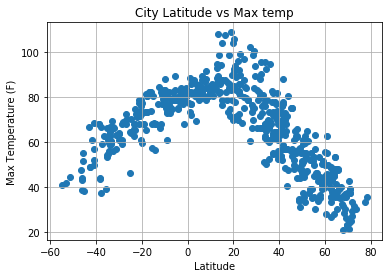

In [14]:
# Build a scatter plot for each data type
plt.scatter(weather_data["lat"], weather_data["maxtemplist"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs Max temp")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Temperature In World Cities.png")

# Show plot
plt.show()

This map shows the most cities near the equator have higher max temps

## Latitude vs. Humidity Plot

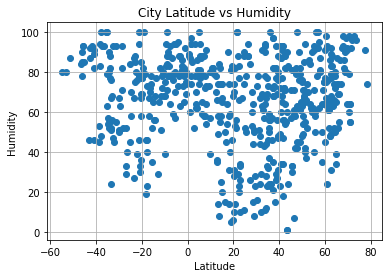

In [15]:
# Build a scatter plot for each data type
plt.scatter(weather_data["lat"], weather_data["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Humidity Plot In World Cities.png")

# Show plot
plt.show()

at the equator there are not any cities with lower than 50% humidity

## Latitude vs. Cloudiness Plot

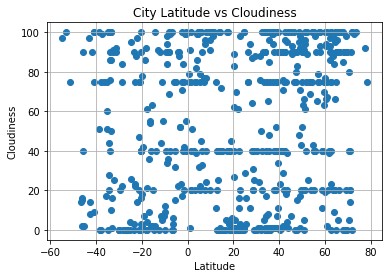

In [16]:
# Build a scatter plot for each data type
plt.scatter(weather_data["lat"], weather_data["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Cloudiness Plot In World Cities.png")

# Show plot
plt.show()

The is no change in cloudiness between either side of the equator

## Latitude vs. Wind Speed Plot

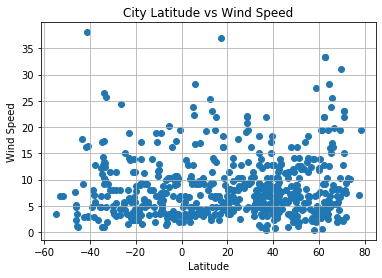

In [18]:
# Build a scatter plot for each data type
plt.scatter(weather_data["lat"], weather_data["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Wind Speed Plot In World Cities.png")

# Show plot
plt.show()

wind speeds look to be equal on both sides of equator

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots

In [19]:
# Create Northern and Southern Hemisphere DataFrames
NHemisphere = weather_data.loc[weather_data['lat']> 0]
SHemisphere = weather_data.loc[weather_data['lat']< 0]

northlat = NHemisphere['lat']
north_maxtemp = NHemisphere['maxtemplist']

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

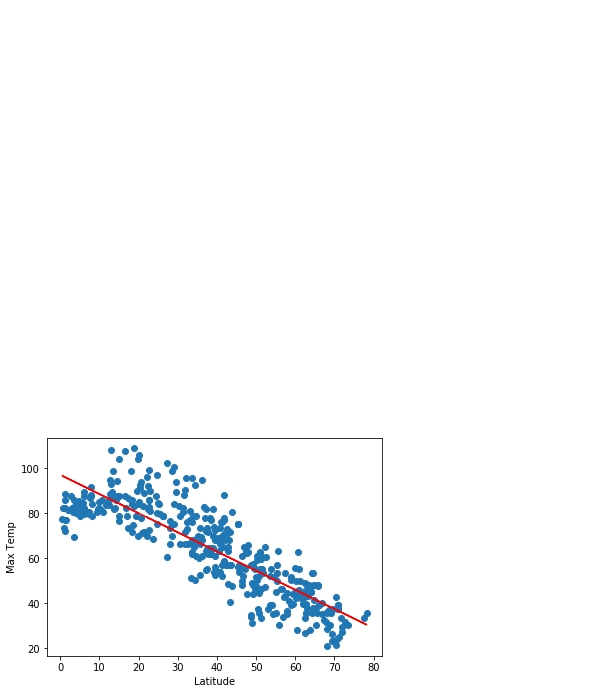

The equation of the regression line is: y = -0.85x + 97.09


In [20]:
# Adding the linear regression equation and line to plot
x_values = northlat
y_values = north_maxtemp
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(100,300),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
# Save the figure
plt.savefig("Northern Hemisphere Max temp Linear Regression.png")
plt.show()
print(f"The equation of the regression line is: {line_eq}")

there is a strong positive relationship as latitude increase the temps go down

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

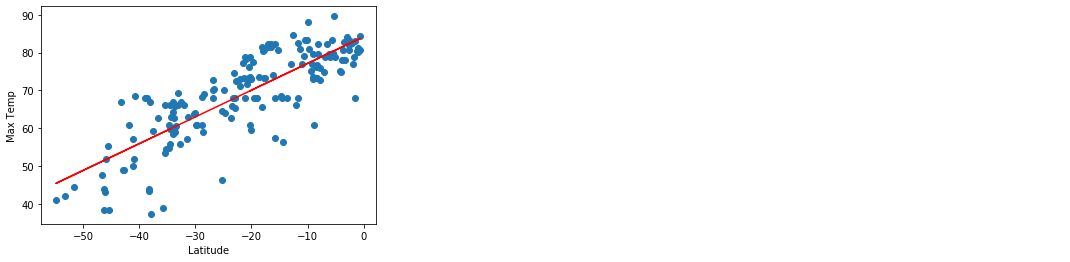

The equation of the regression line is: y = 0.71x + 84.23


In [22]:
southern_lat = SHemisphere["lat"]
southern_maxtemp = SHemisphere["maxtemplist"]

x_values = southern_lat
y_values = southern_maxtemp
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(100,70),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
# save the figure
plt.savefig("southern Hemisphere Max temp Linear Regression.png")
plt.show()
print(f"The equation of the regression line is: {line_eq}")

there is a strong positive relationship as latitude decreases the temps go up

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The equation of the regression line is: y = 0.14x + 58.39


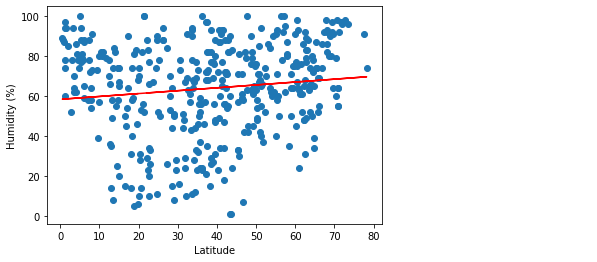

In [23]:
northlat = NHemisphere['lat']
nhumidity = NHemisphere['Humidity']


x_values = northlat
y_values = nhumidity
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(100,70),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
# save the figure
plt.savefig("Northern Hemisphere Humidity(%) Linear Regression.png")
print(f"The equation of the regression line is: {line_eq}")

there is a slight increase in humidity as you increase in latitude

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

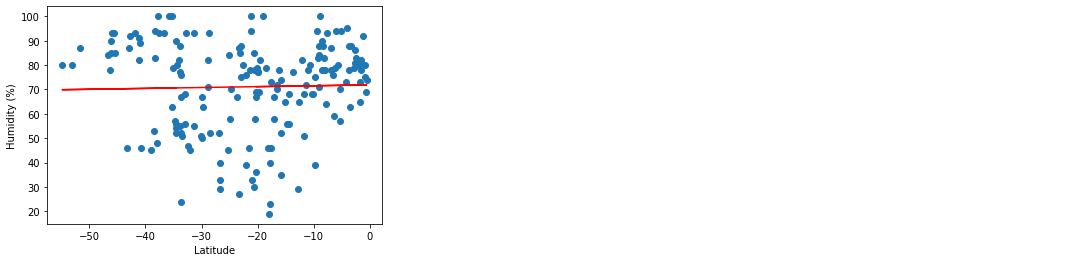

The equation of the regression line is: y = 0.04x + 71.88


In [24]:
southern_lat = SHemisphere["lat"]
southern_humidity = SHemisphere["Humidity"]

x_values = southern_lat
y_values = southern_humidity
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(100,70),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
#save the figure
plt.savefig("Southern Hemisphere Humidity (%) Linear Regression.png")
plt.show()
print(f"The equation of the regression line is: {line_eq}")

There is no relationship

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The equation of the regression line is: y = 0.3x + 42.86


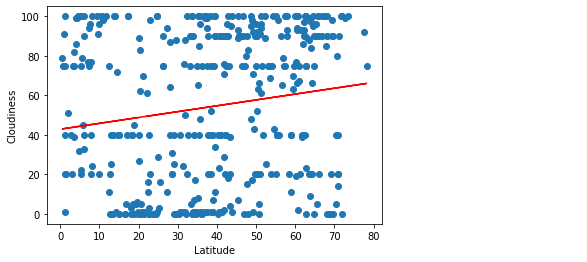

In [25]:
northlat = NHemisphere['lat']
ncloud = NHemisphere['Cloudiness']



x_values = northlat
y_values = ncloud
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(100,70),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
# save the figure
plt.savefig("Northern Hemisphere Cloudiness (%) Linear Regression.png")
print(f"The equation of the regression line is: {line_eq}")

there is no relationship or a weak one. line could be anywhere on this but no relationship

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

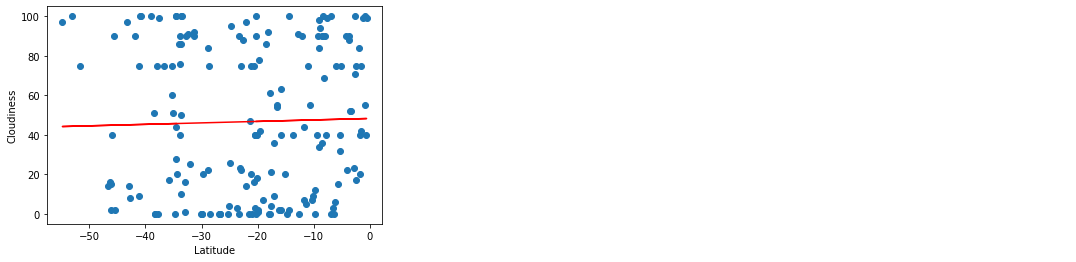

The equation of the regression line is: y = 0.07x + 48.29


In [26]:
southern_lat = SHemisphere["lat"]
southern_cloudines = SHemisphere["Cloudiness"]

x_values = southern_lat
y_values = southern_cloudines
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(100,70),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
# save the figure
plt.savefig("Southern Hemisphere Cloudiness (%) Linear Regression.png")
plt.show()
print(f"The equation of the regression line is: {line_eq}")

no relationship dots are all over the place

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

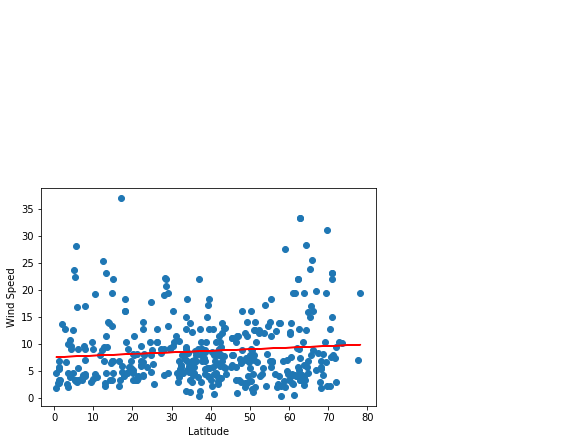

The equation of the regression line is: y = 0.03x + 7.57


In [27]:
northlat = NHemisphere['lat']
nwspeed = NHemisphere['Wind Speed']


x_values = northlat
y_values = nwspeed
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(100,70),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
# save the figure
plt.savefig("Northern Hemisphere Wind Speed Linear Regression.png")
plt.show()
print(f"The equation of the regression line is: {line_eq}")

there is a little increase as you move away for the equator

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The equation of the regression line is: y = -0.01x + 7.49


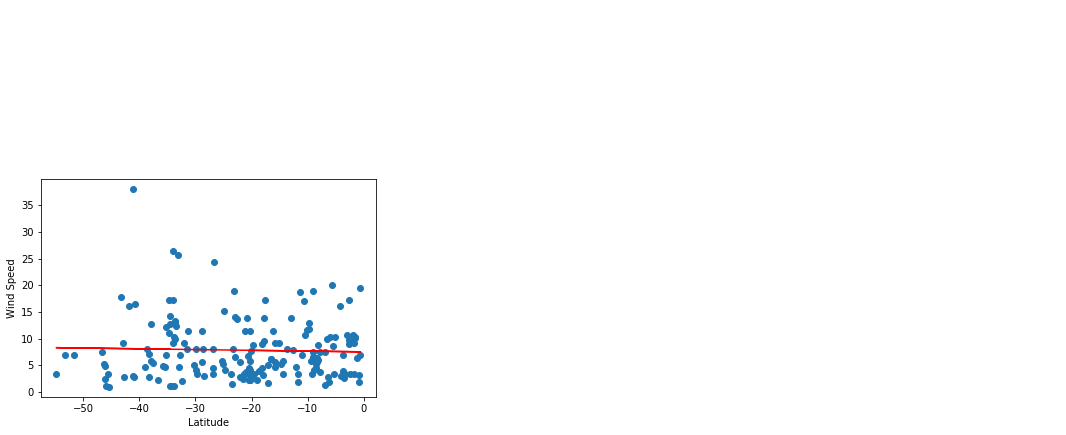

In [28]:
southern_lat = SHemisphere["lat"]
southern_windspeed = SHemisphere["Wind Speed"]

x_values = southern_lat
y_values = southern_windspeed
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(100,70),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
# save the figure
plt.savefig("Southern Hemisphere Wind Speed Linear Regression.png")

print(f"The equation of the regression line is: {line_eq}")

the is a week relationship for wind speed changing with latitude